In [ ]:
# Importing required libraries.
import sys
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline
sns.set(color_codes=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
np.set_printoptions(threshold=sys.maxsize)

**Loading Data and checking for NULL Values in the data**

In [ ]:
#df_test=pd.read_csv('/content/drive/MyDrive/Data/price_test.csv')
#df_train=pd.read_csv('/content/drive/MyDrive/Data/price_train.csv')
url_train='https://raw.githubusercontent.com/ashrayanand/data/main/price_train.csv'
url_test='https://raw.githubusercontent.com/ashrayanand/data/main/price_test.csv'
df_train=pd.read_csv(url_train)
df_test=pd.read_csv(url_test)

print("Any null values in test data: ",df_test.isnull().values.any())
print("Any null values in train data: ",df_train.isnull().values.any())

Any null values in test data:  False
Any null values in train data:  False


In [ ]:
df_train.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


**Data Cleaning :** Counting the total number of amenities provided by each hotels. 
Replacing '$' sign from each attributes which contain them(cleaning_fee, Price). Also removing '%' sign from 'host_response_rate' attributes.
Finally dropping 'amenities','id','X1' , as these are not needed in the model.

In [ ]:
df_test['total_amenities_count']= df_test['amenities'].str.count(',') + 1
df_train['total_amenities_count']= df_train['amenities'].str.count(',') + 1

df_test['cleaning_fee'] = df_test['cleaning_fee'].str.replace('$', '')
df_train['cleaning_fee'] = df_train['cleaning_fee'].str.replace('$', '')
df_train['price'] = df_train['price'].str.replace('$', '')
df_train['price'] = df_train['price'].str.replace(',', '')

df_test['host_response_rate'] = df_test['host_response_rate'].str.replace('%', '')
df_train['host_response_rate'] = df_train['host_response_rate'].str.replace('%', '')

df_train.drop(['amenities', 'id','X1'], axis=1, inplace = True)
df_test.drop(['amenities', 'id','X1'], axis=1, inplace = True)

Checking the data type of each attributes. We see that some continuous numerical attibutes are present as 'object' type in the data. These will be treated as string while regressing over it. 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             3466 non-null   bool   
 1   host_response_rate            3466 non-null   object 
 2   host_response_time            3466 non-null   object 
 3   host_listings_count           3466 non-null   int64  
 4   host_identity_verified        3466 non-null   bool   
 5   accommodates                  3466 non-null   int64  
 6   neighbourhood_group_cleansed  3466 non-null   object 
 7   property_type                 3466 non-null   object 
 8   room_type                     3466 non-null   object 
 9   latitude                      3466 non-null   float64
 10  longitude                     3466 non-null   float64
 11  guests_included               3466 non-null   int64  
 12  bathrooms                     3466 non-null   float64
 13  bed

Converting the above mentioned attributes as numeric values.

In [ ]:
df_train["cleaning_fee"] = pd.to_numeric(df_train["cleaning_fee"])
df_train["price"] = pd.to_numeric(df_train["price"])
df_train["host_response_rate"] = pd.to_numeric(df_train["host_response_rate"])
df_test["cleaning_fee"] = pd.to_numeric(df_test["cleaning_fee"])
df_test["host_response_rate"] = pd.to_numeric(df_test["host_response_rate"])

**EDA and Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


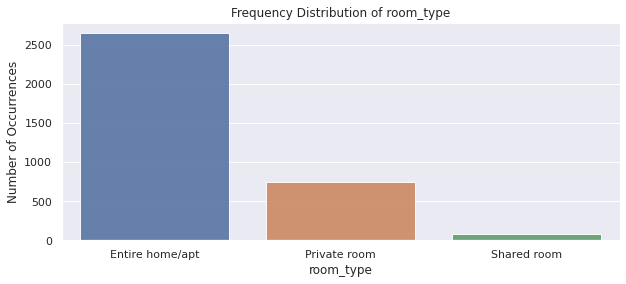

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
room_type_count = df_train['room_type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(room_type_count.index, room_type_count.values, alpha=0.9)
plt.title('Frequency Distribution of room_type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('room_type', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


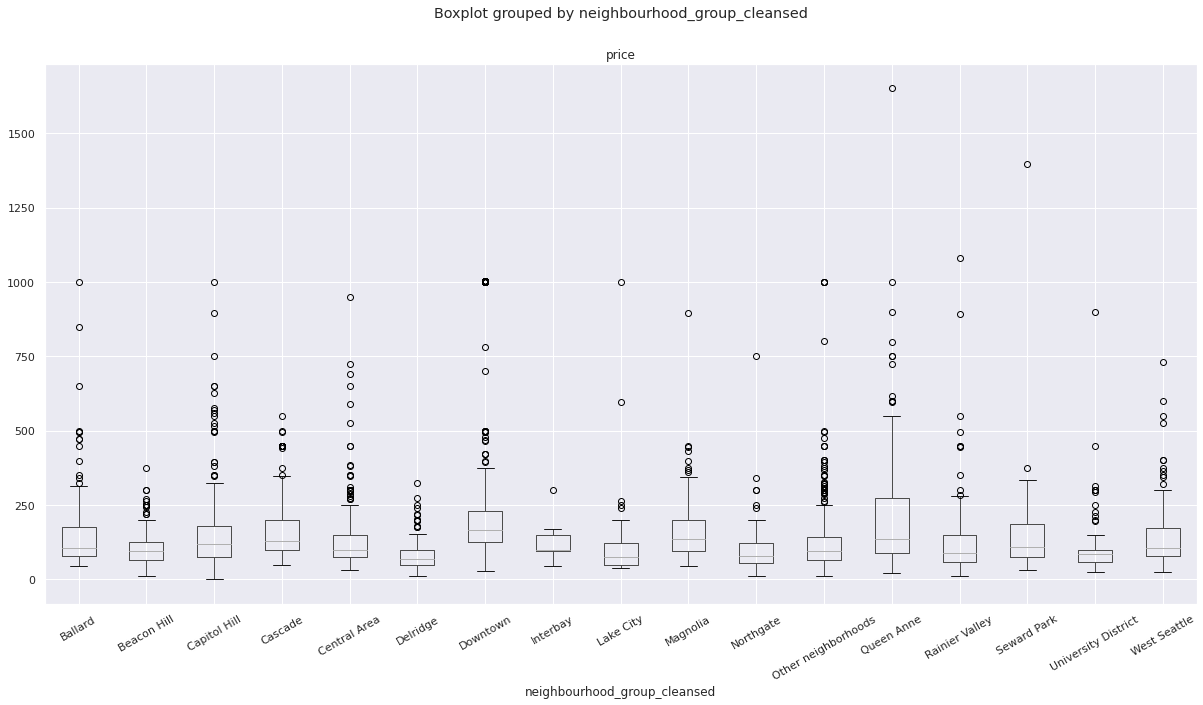

In [ ]:
df_train.boxplot('price','neighbourhood_group_cleansed',rot = 30,figsize=(20,10))

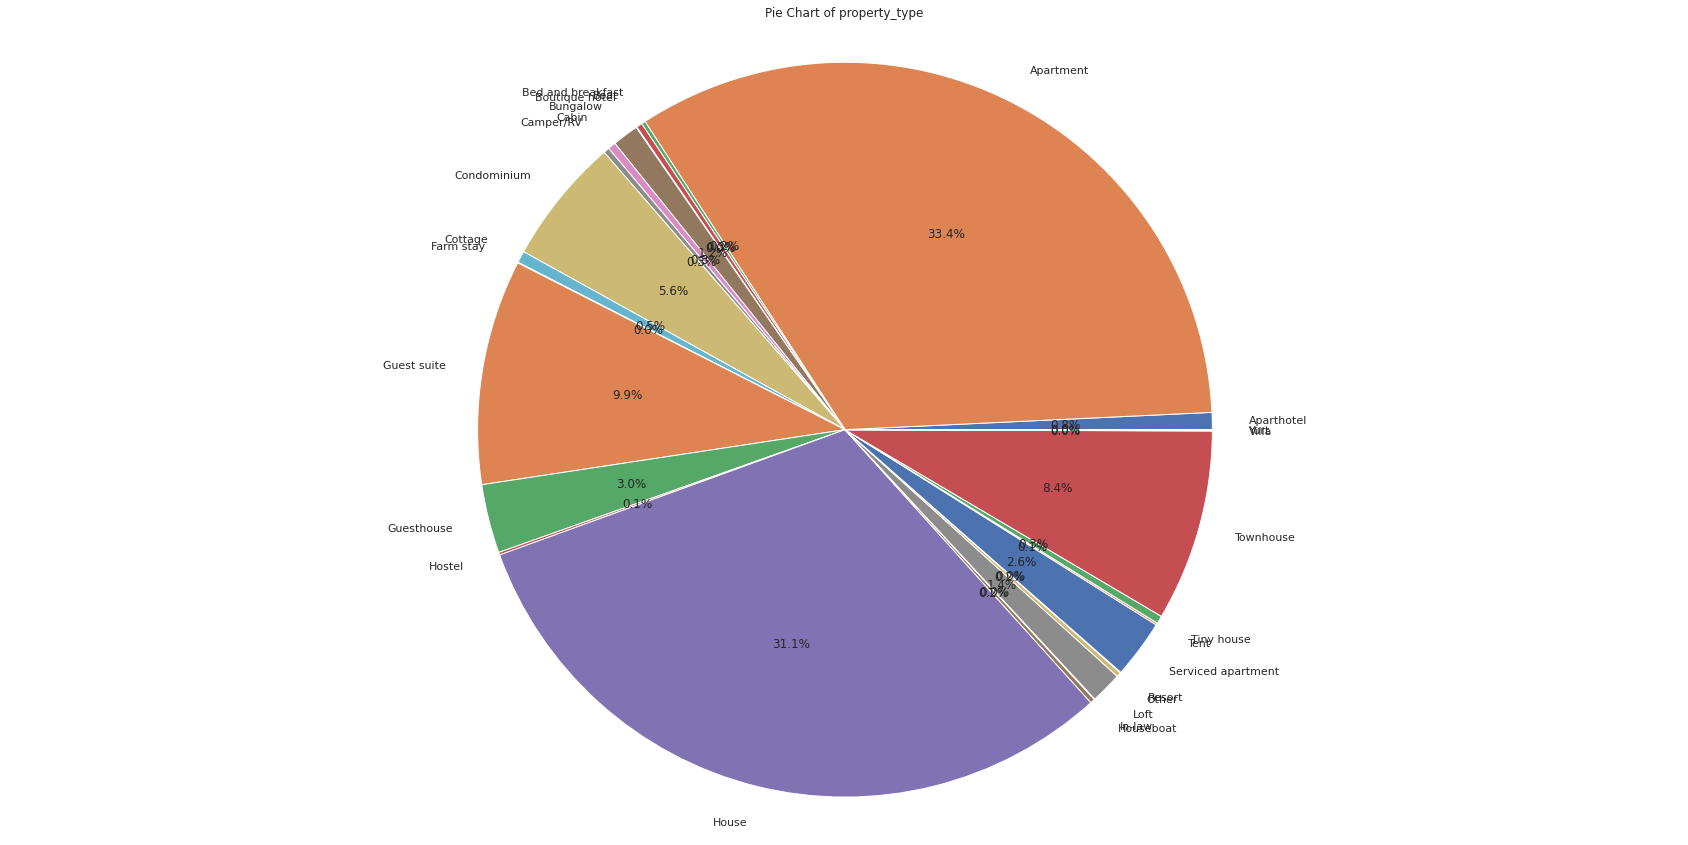

In [ ]:
labels = df_train['property_type'].astype('category').cat.categories.tolist()
counts = df_train['property_type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize=(30,15))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pie Chart of property_type')
plt.show()

[]

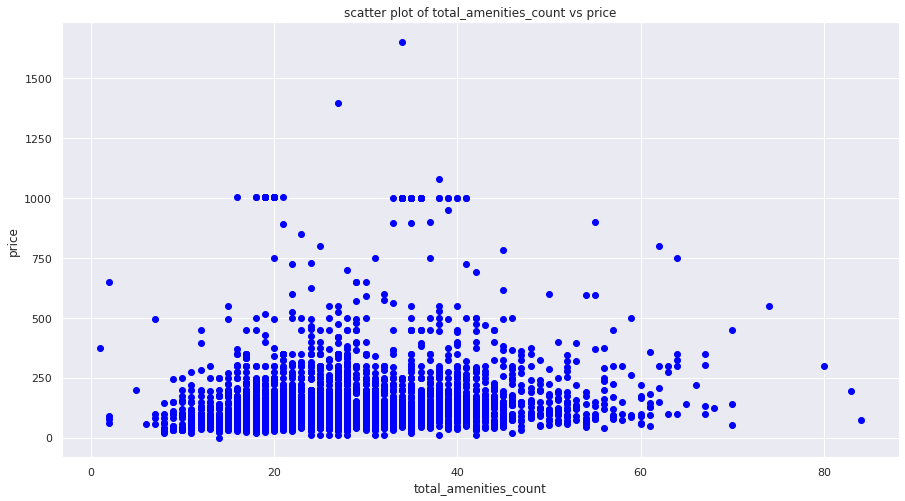

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(df_train['total_amenities_count'], df_train['price'], color='blue')
plt.xlabel('total_amenities_count')
plt.ylabel('price')
plt.title('scatter plot of total_amenities_count vs price')
plt.plot()

Getting numerical attributes to perform correlation analysis

In [ ]:
total_attributes = list(df_train.columns) 
total_attributes.remove('host_is_superhost') 
total_attributes.remove('host_response_time') 
total_attributes.remove('host_identity_verified') 
total_attributes.remove('neighbourhood_group_cleansed')
total_attributes.remove('property_type') 
total_attributes.remove('room_type') 
total_attributes.remove('bed_type')
total_attributes.remove('instant_bookable') 
total_attributes.remove('cancellation_policy')

num_attributes=total_attributes
print("numerical attributes are: ",num_attributes)

numerical attributes are:  ['host_response_rate', 'host_listings_count', 'accommodates', 'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'price', 'total_amenities_count']


In [ ]:
df_train_temp=df_train[num_attributes]

In [ ]:
def feat_corr_analysis(corrmat):
    f, ax = plt.subplots(figsize =(6, 4)) 
    #1 Heatmap
    #ab=corrmat.drop(['diff'], axis =0)
    #ab=ab.drop(['diff'], axis =1)
    #print(ab)
    sns.heatmap(corrmat, vmin=0, vmax=1, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
    plt.title("Heatmap - Correlation between data variables")
    
    #2 Correlation Values and Features
    correlations = corrmat.abs().unstack().sort_values(kind="quicksort").reset_index()
    correlations = correlations[correlations['level_0'] != correlations['level_1']]
    diff_corr = corrmat['price']
    diff_corr = corr_matrix['price'].drop(['price'], axis =0)
    diff_corr = diff_corr.sort_values(ascending = False)  
    
    #Plot with different colours for better visualisation
    clist = [(0, "red"), (0.125, "orange"), (0.25, "green"), (0.5, "blue"), 
             (0.7, "green"), (0.75, "orange"), (1, "red")]
    rvb = mcolors.LinearSegmentedColormap.from_list("", clist)    
    N = diff_corr.shape[0]
    Col_range = np.arange(N).astype(float)
    #Create Bar Plot
    plt.figure(figsize=(6,4))
    plt.bar(diff_corr.index, diff_corr[:],color=rvb(Col_range/N))
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(fontsize=8,rotation=90)
    plt.title('Feature Correlation for Fuel consumption')
    plt.show()
    return 

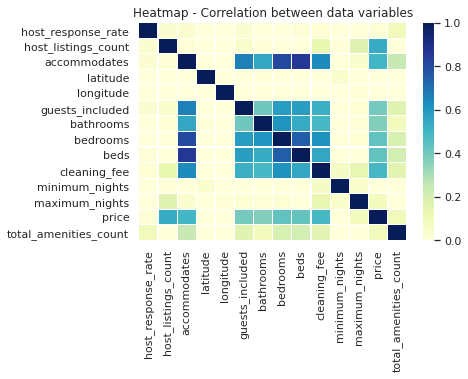

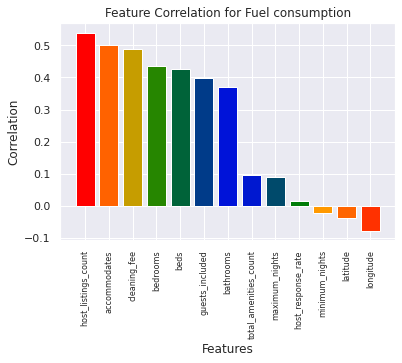

In [ ]:
corr_matrix=df_train_temp.corr()
feat_corr_analysis(corr_matrix)

In [ ]:
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.82:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
print("Feature with high correlation coefficient is: ",correlated_features)

Feature with high correlation coefficient is:  {'beds'}


In [ ]:
for each in num_attributes:
  if each in correlated_features:
    num_attributes.remove(each)

Calculating correlation coefficient. Applying the statistical tests corresponding to the correlation analysis (correlation coefficient) to numerical attributes. In other words, following the testing of the correlation between Price and each of the numerical attributes available (considered to be possible independent variables), these were identified and retained all independent variables as being linearly correlated with the price. Attribute 'beds' has high correlation coefficient, So beds was removed from the list of Numerical Attributes in furthur modelling



In [ ]:
print("Numerical attibutes after correlation analysis are: ",num_attributes)

Numerical attibutes after correlation analysis are:  ['host_response_rate', 'host_listings_count', 'accommodates', 'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'price', 'total_amenities_count']


In [ ]:
cat_attributes=['host_is_superhost','host_response_time', 'host_identity_verified',
                'neighbourhood_group_cleansed', 'property_type', 'room_type','bed_type',
                'instant_bookable', 'cancellation_policy']


In [ ]:
df_train_new=df_train[num_attributes + cat_attributes]
"""
Spliting data between training and test set
""" 

train_dataset = df_train_new.sample(frac=0.8,random_state=0)
test_dataset = df_train_new.drop(train_dataset.index)

y_train=train_dataset['price'].copy()
X_train=train_dataset.drop('price',axis=1)
y_test=test_dataset['price'].copy()
X_test=test_dataset.drop('price',axis=1)

In [ ]:
df_train[num_attributes].describe()

,host_response_rate,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,price,total_amenities_count
count,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000
mean,97.977207,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,69.577611,3.328621,595.884305,159.038950,28.728794
std,10.057830,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,58.357637,10.540059,530.773958,158.735786,10.917757
min,0.000000,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,100.000000,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,30.000000,1.000000,30.000000,79.000000,21.000000
50%,100.000000,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,60.000000,2.000000,365.000000,115.000000,27.000000
75%,100.000000,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,90.000000,2.000000,1125.000000,180.000000,36.000000
max,100.000000,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,430.000000,330.000000,1825.000000,1650.000000,84.000000


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])

"""
Using One Hot encoding for categorical variables.
"""
cat_pipeline=Pipeline([("one_hot_enc",OneHotEncoder()),]) 
num_attributes.remove('price')
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attributes),("cat",cat_pipeline,cat_attributes)
])

In [ ]:
X_train_transformed=full_pipeline.fit_transform(X_train)
X_test_transformed=full_pipeline.transform(X_test)
#type(X_train_transformed)

**Models**

**1. Mutiple Linear Regression**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lin_reg.predict(X_test_transformed)

In [ ]:
print('R²:', r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.6452397951555255
Mean Absolute Error: 55.653825929237286
Mean Squared Error: 9053.023451213667
Root Mean Squared Error: 95.14737753198281


Text(0, 0.5, 'Predictions')

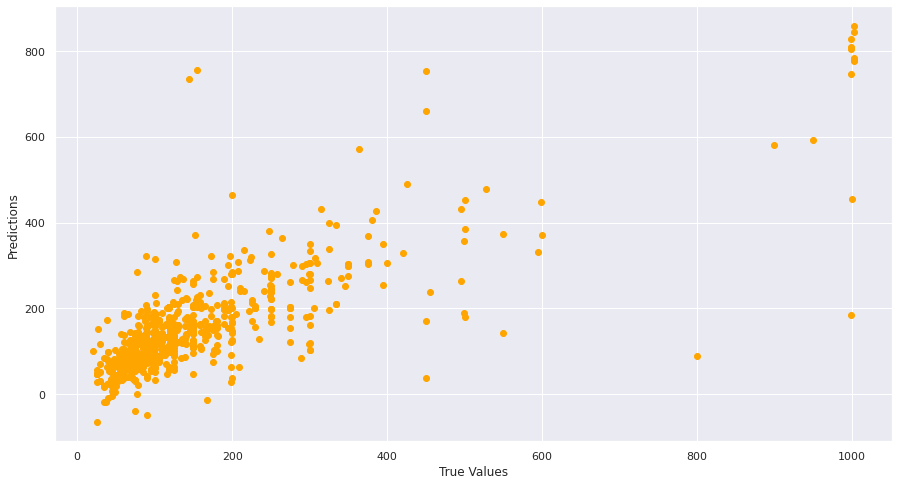

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_pred, color='orange')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

**2. SVR**

Performing Grid search for hyper parameter tuning in order to determine the optimal values for SVR model. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
#grid_result = gsc.fit(X_train_transformed, y_train)
#best_params = grid_result.best_params_
#best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
#                   coef0=0.1, shrinking=True,tol=0.001, cache_size=200, verbose=False, max_iter=-1)

best_svr = SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=10, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
best_svr.fit(X_train_transformed,y_train)

#SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=10, gamma=0.1, 
#                  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000, cache_size=200, coef0=0.1, degree=3, epsilon=10, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svr=best_svr.predict(X_test_transformed)
print('R²:', r2_score(y_test,y_pred_svr))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

R²: 0.7349518068106198
Mean Absolute Error: 46.31328336090196
Mean Squared Error: 6763.688474295464
Root Mean Squared Error: 82.24164683598855


Text(0, 0.5, 'Predictions')

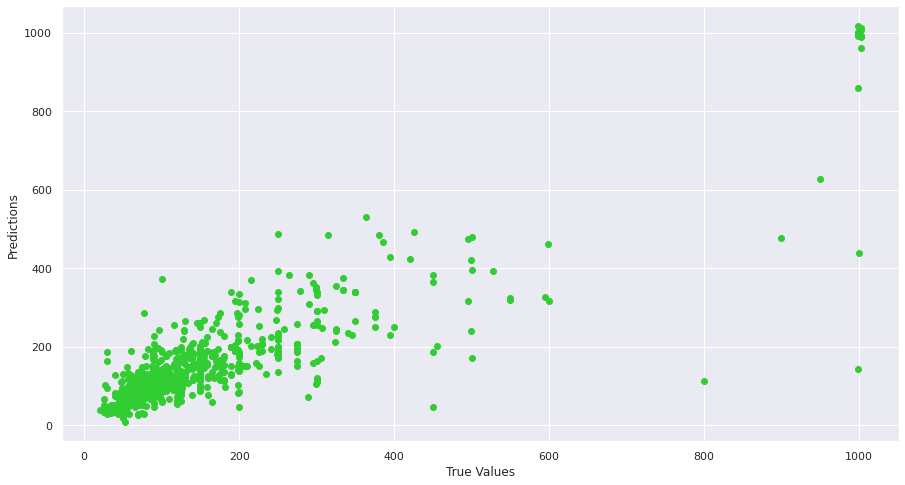

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_pred_svr, color='limegreen')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

**3. Random Forest Regressor**

Now we will use Ensemble method Random Forest Model which combines several base models in order to produce one optimal predictive model.Rather than making one model and hoping this model is the most accurate predictor, ensemble methods take a number of models into account, and average those models to produce one final model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train_transformed, y_train);

In [ ]:
#print(rf_random.best_params_)
#{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}

In [ ]:
# Instantiate model with 800 decision trees as computed above
rf = RandomForestRegressor(n_estimators = 800, min_samples_split= 5, 
                           min_samples_leaf= 1, max_features= 'sqrt', 
                           max_depth= 90, bootstrap = False)
# Train the model on training data
rf.fit(X_train_transformed, y_train);

In [ ]:
# Use the forest's predict method on the test data
y_pred_rfr = rf.predict(X_test_transformed)
print("R²:", r2_score(y_test,y_pred_rfr))
# Calculate the absolute errors
errors = abs(y_pred_rfr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

R²: 0.7746238370797128
Mean Absolute Error: 40.44
Accuracy: 71.07 %.


Text(0, 0.5, 'Predictions')

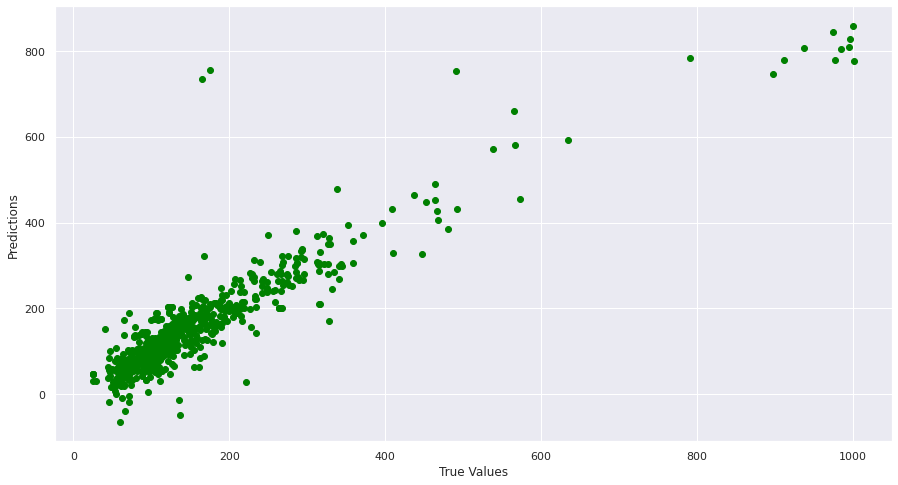

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_pred_rfr, y_pred, color='green')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

**4. ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation=tf.nn.relu, input_shape= X_train_transformed.shape),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(1, activation='linear')
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2773, 32)          2528      
_________________________________________________________________
dense_1 (Dense)              (None, 2773, 32)          1056      
_________________________________________________________________
dense_2 (Dense)              (None, 2773, 1)           33        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = X_train_transformed[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.6981485 ],
       [ 1.2657397 ],
       [ 0.22218746],
       [ 0.4383506 ],
       [-0.15895994],
       [ 1.0382644 ],
       [ 0.2726636 ],
       [ 0.07236642],
       [ 0.5290741 ],
       [ 0.59161603]], dtype=float32)

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train_transformed.toarray() , y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1264.660522,21.850319,1264.660522,9997.514648,56.075722,9997.514648,995
996,1253.508545,21.646666,1253.508545,9993.063477,55.886513,9993.063477,996
997,1256.130371,21.872530,1256.130371,9886.373047,55.701569,9886.373047,997
998,1244.215210,21.701073,1244.215210,10054.029297,56.228722,10054.029297,998
999,1249.163818,21.998724,1249.163818,10042.794922,56.130360,10042.794922,999


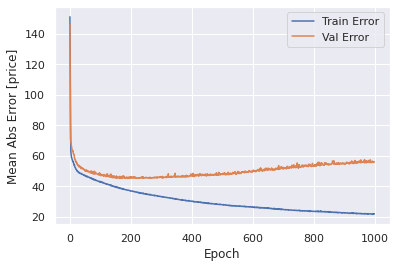

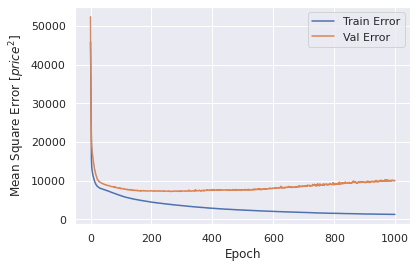

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [price]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
 # plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$price^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
.............................................................................................

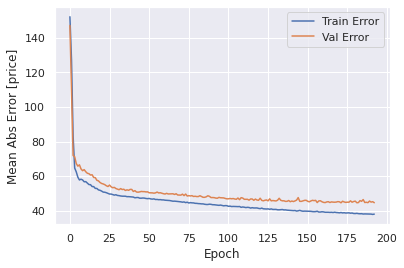

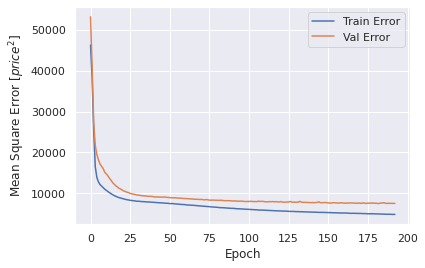

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_transformed.toarray(), y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [ ]:
loss, mae, mse = model.evaluate(X_test_transformed.toarray(), y_test, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

Testing set Mean Abs Error: 47.16 


[]

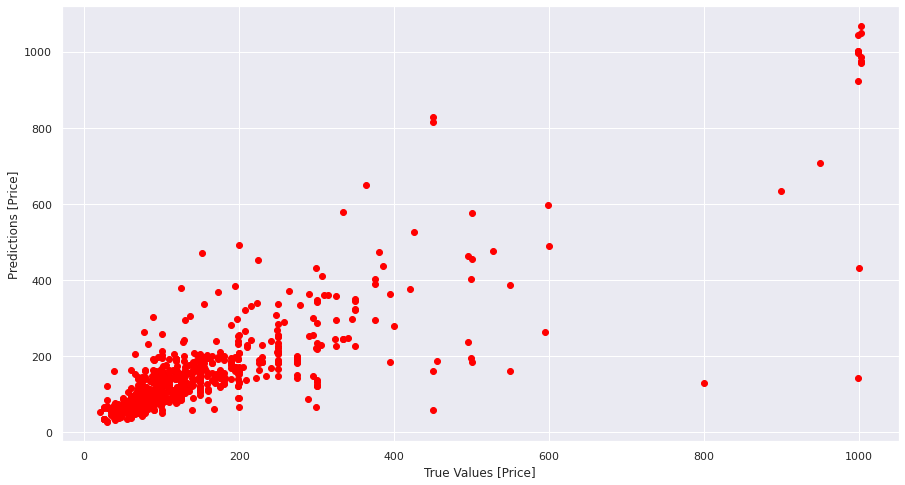

In [ ]:
y_pred_ann = model.predict(X_test_transformed).flatten()

fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(y_test, y_pred_ann, color='red')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.plot()


In [ ]:
print('R²:', r2_score(y_test,y_pred_ann))

R²: 0.7137756267583568


After tuning the number of layers and number of nodes in them, best performanec that could be achieved was with R² score= 0.72. The network is trained by repeatedly presenting it with both the training and test data sets.

In [ ]:
df_test_new=df_test[num_attributes + cat_attributes]
df_test_new.drop(df_test_new[df_test_new['property_type'] == 'Treehouse'].index, inplace = True) # removing new categories in test data 
df_test_new.drop(df_test_new[df_test_new['bed_type'] == 'Couch'].index, inplace = True) # removing new categories in test data
df_test_transformed=full_pipeline.transform(df_test_new)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Since Random Forest is the best model out of all. So we can use that to predict the price of test data.

In [ ]:
y_pred_rfr = rf.predict(df_test_transformed)

In [ ]:
df_test_new['price']=y_pred_rfr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test_new.to_csv('out.csv')